In [1]:
import cv2
import mediapipe as mp
import numpy as np
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

Options for Image Segmenter

In [2]:
model_path = "../models/selfie_multiclass_256x256.tflite"
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.ImageSegmenterOptions(base_options=base_options,
                                       output_category_mask=True, output_confidence_masks=False)


Create Image Segmenter

In [3]:
with vision.ImageSegmenter.create_from_options(options) as segmenter:
    # Load input image
    input_image = mp.Image.create_from_file("D:\Documents\Education\Bournemouth\Semester2\Masterclass\Code\data\images\wynonnaearp.jpg")

    # Segment
    segmentation_result = segmenter.segment(input_image)

    # Get category mask
    category_mask = np.array(segmentation_result.category_mask.numpy_view())

# Define category labels
labels = {
    "Background": 0,
    "Hair": 1,
    "Body Skin": 2,
    "Face Skin": 3,
    "Clothes": 4,
    "Others (Accessories)": 5
}

# Select a label
selected_label = "Face Skin"
selected_index = labels[selected_label]

# Load og image
og_image = cv2.imread("D:\Documents\Education\Bournemouth\Semester2\Masterclass\Code\data\images\wynonnaearp.jpg")
og_image = cv2.cvtColor(og_image, cv2.COLOR_BGR2RGB)

# Create binary mask
binary_mask = (category_mask == selected_index).astype(np.uint8) * 255

# Apply mask to og image
segmented_image = cv2.bitwise_and(og_image, og_image, mask=binary_mask)


C:\Users\kb_f5\anaconda3\envs\masterclass\lib\site-packages\mediapipe\tasks\python\vision\image_segmenter.py:158: UserWarning: MessageFactory class is deprecated. Please use GetMessageClass() instead of MessageFactory.GetPrototype. MessageFactory class will be removed after 2024.
  graph_config = self._runner.get_graph_config()


Display

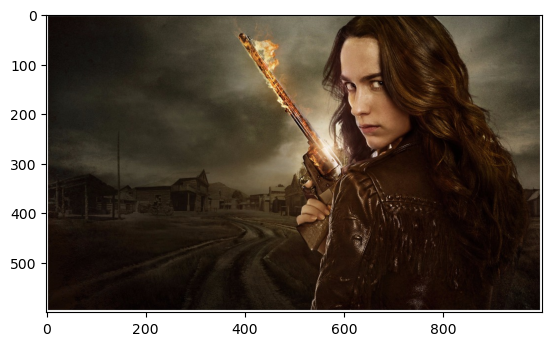

In [4]:
plt.imshow(og_image) 

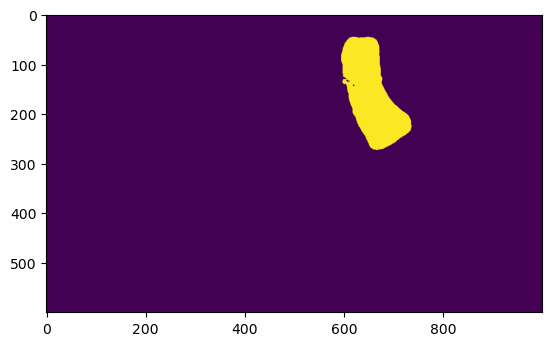

In [5]:
plt.imshow(binary_mask)

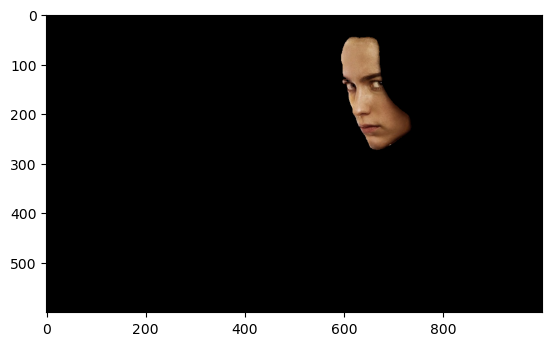

In [6]:
plt.imshow(segmented_image)